# 라이브러리 설정 & 구글 드라이브 연동 & 파일 경로 설정

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from PIL import Image
import numpy as np
import cv2
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

# 구글 드라이브 연결
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 없는 폴더를 만드는 코드
def create_folder(directory):
    if not os.path.exists(directory):
      print('no')
      os.makedirs(directory)

In [ ]:
v5 = '/content/drive/MyDrive/cv/braillev5'
v7 = '/content/drive/MyDrive/cv/braillev7'
v8 = '/content/drive/MyDrive/cv/braillev8'

# Yolo 경량화 모델들의 성능 비교

### 1. Yolov5n

In [ ]:
# 가장 경량화 된 모델 준비
%cd /content/drive/MyDrive/cv/yolov5/

!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

In [ ]:
import yaml

# 파일 경로 설정
file_path = '/content/drive/MyDrive/cv/braillev5/data.yaml'

# YAML 파일 열기
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# 경로 수정
data['train'] = '/content/drive/MyDrive/cv/braillev5/train/images'
data['val'] = '/content/drive/MyDrive/cv/braillev5/valid/images'
data['test'] = '/content/drive/MyDrive/cv/braillev5/test/images'

# YAML 파일 저장
with open(file_path, 'w') as file:
    yaml.safe_dump(data, file)

print("YAML 파일이 성공적으로 수정되었습니다.")


YAML 파일이 성공적으로 수정되었습니다.


In [ ]:
# yolov5를 이용한 커스텀 데이터 학습

%cd /content/drive/MyDrive/cv/yolov5
!python train.py --device 0 --img 640 --batch 8 --epochs 10 --data /content/drive/MyDrive/cv/braillev5/data.yaml --weights /content/drive/MyDrive/cv/yolov5/yolov5s.pt --cache

### 2. Yolov7-tiny

In [ ]:
%cd /content/drive/MyDrive/cv/

create_folder('/content/drive/MyDrive/cv/braillev7')

%cd /content/drive/MyDrive/cv/braillev7

!curl -L "https://universe.roboflow.com/ds/pfDIV2mTty?key=gRr7h6j5wC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
# 가장 경량화 된 모델 준비
%cd /content/drive/MyDrive/cv/

!git clone https://github.com/WongKinYiu/yolov7.git

In [ ]:
%cd /content/drive/MyDrive/cv/yolov7
# yolov7을 위한 패키지 설치 -> 완료
!pip install -r requirements.txt

In [ ]:
# 가장 경량화 된 pretrained된 yolov7-tiny모델의 가중치를 가져옴
%cd /content/drive/MyDrive/cv/yolov7/

!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [ ]:
import yaml

# 파일 경로 설정
file_path = '/content/drive/MyDrive/cv/braillev7/data.yaml'

# YAML 파일 열기
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# 경로 수정
data['train'] = '/content/drive/MyDrive/cv/braillev7/train/images'
data['val'] = '/content/drive/MyDrive/cv/braillev7/valid/images'
data['test'] = '/content/drive/MyDrive/cv/braillev7/test/images'

# YAML 파일 저장
with open(file_path, 'w') as file:
    yaml.safe_dump(data, file)

print("YAML 파일이 성공적으로 수정되었습니다.")


YAML 파일이 성공적으로 수정되었습니다.


In [ ]:
# yolov7-tiny 모델 학습

%cd /content/drive/MyDrive/cv/yolov7
!python train.py --device 0 --batch 8 --epochs 10 --data /content/drive/MyDrive/cv/braillev7/data.yaml --weights '/content/drive/MyDrive/cv/yolov7/yolov7-tiny.pt' --cache

### 3. Yolov8n

In [ ]:
# 가장 경량화 된 모델 준비

%cd /content/drive/MyDrive/cv/braillev8

!pip install ultralytics

/content/drive/MyDrive/cv/braillev8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.9/777.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
import yaml

# 파일 경로 설정
file_path = '/content/drive/MyDrive/cv/braillev8/data.yaml'

# YAML 파일 열기
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

# 경로 수정
data['train'] = '/content/drive/MyDrive/cv/braillev8/train/images'
data['val'] = '/content/drive/MyDrive/cv/braillev8/valid/images'
data['test'] = '/content/drive/MyDrive/cv/braillev8/test/images'

# YAML 파일 저장
with open(file_path, 'w') as file:
    yaml.safe_dump(data, file)

print("YAML 파일이 성공적으로 수정되었습니다.")


YAML 파일이 성공적으로 수정되었습니다.


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 143MB/s]


In [ ]:
# 학습시키기
%cd /content/drive/MyDrive/cv/yolov8

model.train(data='/content/drive/MyDrive/cv/braillev8/data.yaml', epochs = 10, batch=8, imgsz=640, device=0)

# 표를 통한 성능비교

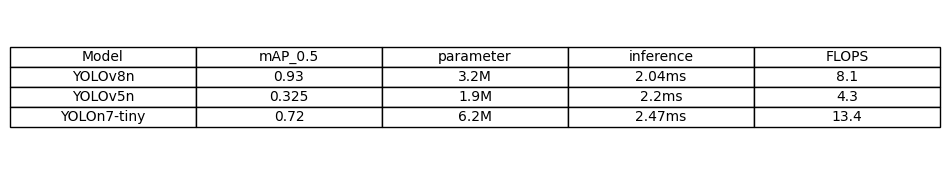

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
columns = ['Model', 'mAP_0.5', 'parameter', 'inference', 'FLOPS']
comparison_df = pd.DataFrame(columns=columns)

# 데이터를 추가할 함수
def add_model_info(model_name, map_value, parameter_value, inference_value, flop_value):
    global comparison_df
    new_data = {
        'Model': model_name,
        'mAP_0.5': map_value,
        'parameter': parameter_value,
        'inference': inference_value,
        'FLOPS': flop_value
    }
    # 데이터프레임 확장
    comparison_df = pd.concat([comparison_df, pd.DataFrame([new_data])], ignore_index=True)

# 예시 데이터 추가
add_model_info('YOLOv8n', '0.93', '3.2M', '2.04ms', '8.1')
add_model_info('YOLOv5n', '0.325', '1.9M','2.2ms',  '4.3')
add_model_info('YOLOn7-tiny','0.72','6.2M', '2.47ms', '13.4')

# DataFrame을 목록의 목록으로 변환
table_data = [comparison_df.columns.tolist()] + comparison_df.values.tolist()

# DataFrame을 이미지로 저장
fig, ax = plt.subplots(figsize=(10, 2))  # 그림 크기 조정
ax.axis('tight')
ax.axis('off')
tbl = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2]*len(comparison_df.columns))

# 표 크기 및 글꼴 크기 조정
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# 이미지 파일로 저장
plt.savefig('ob_compare.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


# Yolov8n 경량화 & 최적화

## 1. 경량화

In [ ]:
# Backbone network 적용

%cd /content/drive/MyDrive/cv/yolov8s/

# BackBone에 Ghost conv층으로 변환하여 경량화
import yaml

# YOLOv8 모델 정의
yolov8_ghost = {
    'nc': 27,  # number of classes
    'scales': {  # model compound scaling constants
        'n': [0.33, 0.25, 1024],
        's': [0.33, 0.50, 1024],
        'm': [0.67, 0.75, 768],
        'l': [1.00, 1.00, 512],
        'x': [1.00, 1.25, 512]
    },
    'backbone': [
        [-1, 1, 'Conv', [64, 3, 2]],
        [-1, 1, 'GhostConv', [128, 3, 2]],
        [-1, 3, 'C3Ghost', [128, True]],
        [-1, 1, 'GhostConv', [256, 3, 2]],
        [-1, 6, 'C3Ghost', [256, True]],
        [-1, 1, 'GhostConv', [512, 3, 2]],
        [-1, 6, 'C3Ghost', [512, True]],
        [-1, 1, 'GhostConv', [1024, 3, 2]],
        [-1, 3, 'C3Ghost', [1024, True]],
        [-1, 1, 'SPPF', [1024, 5]]
    ],
    'head': [
        [-1, 1, 'nn.Upsample', [None, 2, 'nearest']],
        [[-1, 6], 1, 'Concat', [1]],
        [-1, 3, 'C3Ghost', [512]],
        [-1, 1, 'nn.Upsample', [None, 2, 'nearest']],
        [[-1, 4], 1, 'Concat', [1]],
        [-1, 3, 'C3Ghost', [256]],
        [-1, 1, 'GhostConv', [256, 3, 2]],
        [[-1, 12], 1, 'Concat', [1]],
        [-1, 3, 'C3Ghost', [512]],
        [-1, 1, 'GhostConv', [512, 3, 2]],
        [[-1, 9], 1, 'Concat', [1]],
        [-1, 3, 'C3Ghost', [1024]],
        [[15, 18, 21], 1, 'Detect', [80]]
    ]
}

# YAML 파일로 저장
with open('yolov8n_ghost.yaml', 'w') as file:
    yaml.dump(yolov8_ghost, file, default_flow_style=False)

print("YAML 파일이 성공적으로 생성되었습니다.")


In [ ]:
# Ghost Conv층 적용

from ultralytics import YOLO

# Pretrained YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

# 모델 정의 파일 로드
model.model.load_cfg('yolov8n_ghost.yaml')

# 재학습 시작
model.train(data='/content/drive/MyDrive/cv/braillev8/data.yaml', epochs=10, batch=8, imgsz=640, device=0)

In [ ]:
# Backbone network 적용

%cd /content/drive/MyDrive/cv/yolov8s/

# BackBone에 Ghost conv층으로 변환하여 경량화
import yaml

# YOLOv8 모델 정의
yolov8_ghost = {

  nc: 80  # number of classes
  scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
    # [depth, width, max_channels]
    n: [0.33, 0.25, 1024]  # YOLOv8n summary: 225 layers,  3157200 parameters,  3157184 gradients,   8.9 GFLOPs
    s: [0.33, 0.50, 1024]  # YOLOv8s summary: 225 layers, 11166560 parameters, 11166544 gradients,  28.8 GFLOPs
    m: [0.67, 0.75, 768]   # YOLOv8m summary: 295 layers, 25902640 parameters, 25902624 gradients,  79.3 GFLOPs
    l: [1.00, 1.00, 512]   # YOLOv8l summary: 365 layers, 43691520 parameters, 43691504 gradients, 165.7 GFLOPs
    x: [1.00, 1.25, 512]   # YOLOv8x summary: 365 layers, 68229648 parameters, 68229632 gradients, 258.5 GFLOPs
  },
  # YOLOv8.0n backbone
  backbone:[
    # [from, repeats, module, args]
    - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
    - [-1, 1, Conv, [128, 3, 2]]  # 1-P2/4
    - [-1, 3, C2f, [128, True]]
    - [-1, 1, Conv, [256, 3, 2]]  # 3-P3/8
    - [-1, 6, C2f, [256, True]]
    - [-1, 6, C2f, [512, True]]
    - [-1, 1, Conv, [1024, 3, 2]]  # 7-P5/32
    - [-1, 3, C2f, [1024, True]]
    - [-1, 1, SPPF, [1024, 5]]  # 9
  ]
  # YOLOv8.0n head
  head:[]
    - [[2, 4, 6, 9], 1, SimFusion_4in, []] # 10
    - [-1, 1, IFM, [[64, 32]]] # 11

    - [6, 1, Conv, [256, 1, 1]] # 12
    - [[2, 4, -1], 1, SimFusion_3in, [256]] # 13
    - [[-1, 11], 1, InjectionMultiSum_Auto_pool, [256, [64, 32], 1]] # 14
    - [-1, 3, C2f, [256]] # 15

    - [[15], 1, Detect, [nc]] # 16
